In [2]:
# magic function
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [18]:
# libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.express as px
import io
import warnings
import pandas_profiling as pp
from pandas_profiling import ProfileReport
warnings.filterwarnings(action = "ignore",category=FutureWarning)
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score, confusion_matrix, roc_curve, roc_auc_score, r2_score
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.min_rows',None)
pd.set_option('display.expand_frame_repr',True)

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving client_data.csv to client_data.csv


In [5]:
# reading through colab session
# client_df = pd.read_csv(io.BytesIO(uploaded['client_data.csv']))
client_df = pd.read_csv('/content/client_data.csv')
client_df.head()
client_df.shape

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.00,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.00,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.00,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.00,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0
4,149d57cf92fc41cf94415803a877cb4b,MISSING,4425,0,526,2010-01-13,2016-03-07,2010-01-13,2015-03-09,445.75,526,0.0,131.73,0.116900,0.100015,40.606701,f,52.32,44.91,44.91,1,47.98,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,19.800,0


(14606, 26)

DataSet 2

In [8]:
from google.colab import files
uploaded = files.upload()

Saving price_data.csv to price_data.csv


In [9]:
# reading through colab session
# price_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
price_df = pd.read_csv('/content/price_data.csv')
price_df.head()
price_df.shape

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


(193002, 8)

**Descriptive statistics of data.**


Data types
It is useful to first understand the data that you're dealing with along with the data types of each column. The data types may dictate how you transform and engineer features.

To get an overview of the data types within a data frame, use the info() method.

In [10]:
client_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         

In [11]:
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


### Statistics

Now let's look at some statistics about the datasets. We can do this by using the `describe()` method.

In [12]:
client_df.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [13]:
price_df.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


#EDA

### Missing Values

In [14]:
features_with_na = [feature for feature in client_df.columns if client_df[feature].isnull().sum() > 1]
features_with_na

[]

In [24]:
# finding proportion of missing values in client dataset
for feature in client_df:
  print(f"{feature} {np.round(client_df[feature].isnull().mean(),4)} missing values")

id 0.0 missing values 
channel_sales 0.0 missing values 
cons_12m 0.0 missing values 
cons_gas_12m 0.0 missing values 
cons_last_month 0.0 missing values 
date_activ 0.0 missing values 
date_end 0.0 missing values 
date_modif_prod 0.0 missing values 
date_renewal 0.0 missing values 
forecast_cons_12m 0.0 missing values 
forecast_cons_year 0.0 missing values 
forecast_discount_energy 0.0 missing values 
forecast_meter_rent_12m 0.0 missing values 
forecast_price_energy_off_peak 0.0 missing values 
forecast_price_energy_peak 0.0 missing values 
forecast_price_pow_off_peak 0.0 missing values 
has_gas 0.0 missing values 
imp_cons 0.0 missing values 
margin_gross_pow_ele 0.0 missing values 
margin_net_pow_ele 0.0 missing values 
nb_prod_act 0.0 missing values 
net_margin 0.0 missing values 
num_years_antig 0.0 missing values 
origin_up 0.0 missing values 
pow_max 0.0 missing values 
churn 0.0 missing values 


In [25]:
client_df.isnull().sum()/client_df.shape[0]

id                                0.0
channel_sales                     0.0
cons_12m                          0.0
cons_gas_12m                      0.0
cons_last_month                   0.0
date_activ                        0.0
date_end                          0.0
date_modif_prod                   0.0
date_renewal                      0.0
forecast_cons_12m                 0.0
forecast_cons_year                0.0
forecast_discount_energy          0.0
forecast_meter_rent_12m           0.0
forecast_price_energy_off_peak    0.0
forecast_price_energy_peak        0.0
forecast_price_pow_off_peak       0.0
has_gas                           0.0
imp_cons                          0.0
margin_gross_pow_ele              0.0
margin_net_pow_ele                0.0
nb_prod_act                       0.0
net_margin                        0.0
num_years_antig                   0.0
origin_up                         0.0
pow_max                           0.0
churn                             0.0
dtype: float

In [26]:
# finding proportion of missing values in price dataset
for feature in price_df:
  print(f"{feature} {np.round(price_df[feature].isnull().mean(),4)} missing values")

id 0.0 missing values
price_date 0.0 missing values
price_off_peak_var 0.0 missing values
price_peak_var 0.0 missing values
price_mid_peak_var 0.0 missing values
price_off_peak_fix 0.0 missing values
price_peak_fix 0.0 missing values
price_mid_peak_fix 0.0 missing values


# Finding Churn Rate

In [28]:
# churn count
churn_count = client_df['churn'].value_counts()
churn_count

0    13187
1     1419
Name: churn, dtype: int64

In [31]:
# churn rate
rate_of_churn = pd.DataFrame(churn_count/client_df.shape[0] * 100)
rate_of_churn

,churn
0,90.284814
1,9.715186


# Observation

The number of companies that have churned out id 1419 which represent 9.7% 

In [38]:
churn = client_df[['id', 'churn']]
# rename id to companies
churn.columns = ['Companies', 'churn']
churn.head()

,Companies,churn
0,24011ae4ebbe3035111d65fa7c15bc57,1
1,d29c2c54acc38ff3c0614d0a653813dd,0
2,764c75f661154dac3a6c254cd082ea7d,0
3,bba03439a292a1e166f80264c16191cb,0
4,149d57cf92fc41cf94415803a877cb4b,0


In [45]:
def plot_stacked_bars(dataframe, title_, size_=(18, 10), rot_=0, legend_="upper right"):
    """
    Plot stacked bars with annotations
    """
    ax = dataframe.plot(
        kind="bar",
        stacked=True,
        figsize=size_,
        rot=rot_,
        title=title_
    )

    # Annotate bars
    annotate_stacked_bars(ax, textsize=14)
    # Rename legend
    plt.legend(["Retention", "Churn"], loc=legend_)
    # Labels
    plt.ylabel("Company base (%)")
    plt.show()
    
def annotate_stacked_bars(ax, pad=0.99, colour="white", textsize=13):
    """
    Add value annotations to the bars
    """

    # Iterate over the plotted rectanges/bars
    for p in ax.patches:
        
        # Calculate annotation
        value = str(round(p.get_height(),1))
        # If value is 0 do not annotate
        if value == '0.0':
            continue
        ax.annotate(
            value,
            ((p.get_x()+ p.get_width()/2)*pad-0.05, (p.get_y()+p.get_height()/2)*pad),
            color=colour,
            size=textsize
        )

def plot_distribution(dataframe, column, ax, bins_=50):
    """
    Plot variable distirbution in a stacked histogram of churned or retained company
    """
    # Create a temporal dataframe with the data to be plot
    temp = pd.DataFrame({"Retention": dataframe[dataframe["churn"]==0][column],
    "Churn":dataframe[dataframe["churn"]==1][column]})
    # Plot the histogram
    temp[["Retention","Churn"]].plot(kind='hist', bins=bins_, ax=ax, stacked=True)
    # X-axis label
    ax.set_xlabel(column)
    # Change the x-axis to plain style
    ax.ticklabel_format(style='plain', axis='x')

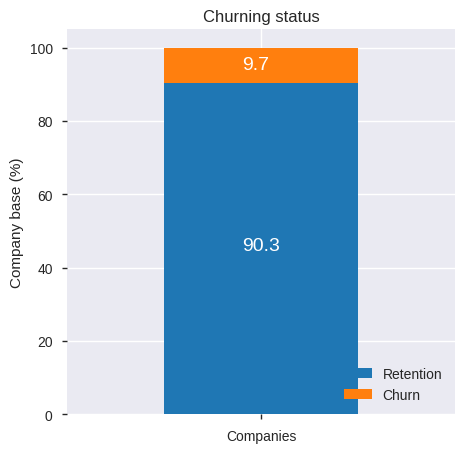

In [46]:
churn_total = churn.groupby(churn['churn']).count()
churn_percentage = churn_total / churn_total.sum() * 100
plot_stacked_bars(churn_percentage.transpose(), "Churning status", (5, 5), legend_="lower right")

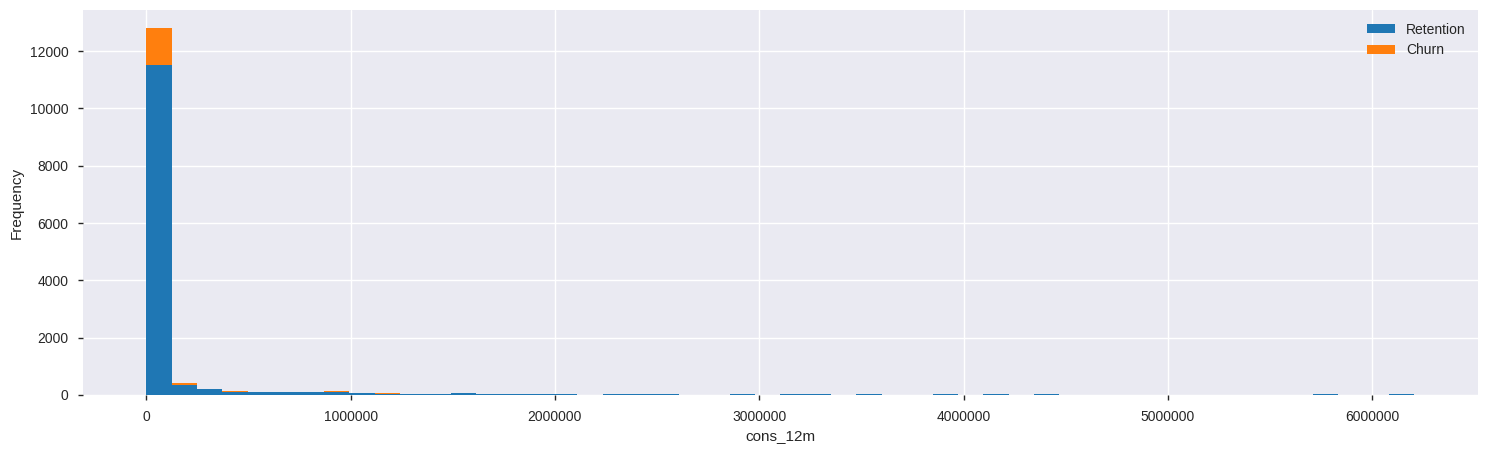

In [47]:
consumption = client_df[['id', 'cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'has_gas', 'churn']]

fig, axs = plt.subplots(nrows=1, figsize=(18, 5))

plot_distribution(consumption, 'cons_12m', axs)

# Correlation

In [50]:
client_df.corr()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
cons_12m,1.000000,0.488474,0.968212,0.193947,0.167093,-0.043282,0.065268,-0.007748,0.145908,-0.026566,0.159711,-0.011926,-0.011905,0.154251,0.133614,-0.003565,0.082889,-0.045968
cons_gas_12m,0.488474,1.000000,0.507007,0.084359,0.080934,-0.012595,0.041393,-0.017684,0.074002,-0.020558,0.077846,0.006868,0.006852,0.239387,0.070867,-0.013815,0.054317,-0.037957
cons_last_month,0.968212,0.507007,1.000000,0.177773,0.193574,-0.040874,0.057476,-0.005187,0.136802,-0.023017,0.187034,-0.011498,-0.011477,0.169099,0.121835,-0.003677,0.074529,-0.045284
forecast_cons_12m,0.193947,0.084359,0.177773,1.000000,0.647727,0.058435,0.305627,-0.135646,0.254056,-0.018477,0.634600,-0.023220,-0.023231,0.055915,0.768537,0.021283,0.393946,0.012949
forecast_cons_year,0.167093,0.080934,0.193574,0.647727,1.000000,0.008518,0.276009,-0.158012,0.251005,-0.044190,0.969395,-0.010759,-0.010727,0.040426,0.464928,0.048248,0.309647,-0.002558
forecast_discount_energy,-0.043282,-0.012595,-0.040874,0.058435,0.008518,1.000000,-0.008388,0.353735,0.059318,0.048024,0.037939,0.241142,0.240421,0.106812,0.079784,-0.070697,-0.005032,0.017026
forecast_meter_rent_12m,0.065268,0.041393,0.057476,0.305627,0.276009,-0.008388,1.000000,-0.579353,0.706376,-0.203089,0.224212,0.183509,0.183566,0.018109,0.275830,0.071558,0.618549,0.044245
forecast_price_energy_off_peak,-0.007748,-0.017684,-0.005187,-0.135646,-0.158012,0.353735,-0.579353,1.000000,-0.330138,0.630377,-0.092535,0.094498,0.094216,0.035093,-0.135107,-0.168095,-0.384397,-0.010837
forecast_price_energy_peak,0.145908,0.074002,0.136802,0.254056,0.251005,0.059318,0.706376,-0.330138,1.000000,-0.242017,0.212317,0.165483,0.165560,0.044141,0.234942,0.080260,0.411532,0.029315
forecast_price_pow_off_peak,-0.026566,-0.020558,-0.023017,-0.018477,-0.044190,0.048024,-0.203089,0.630377,-0.242017,1.000000,-0.011318,-0.061869,-0.061925,-0.005335,-0.072623,-0.120136,-0.095897,0.014778


<Figure size 1600x900 with 0 Axes>

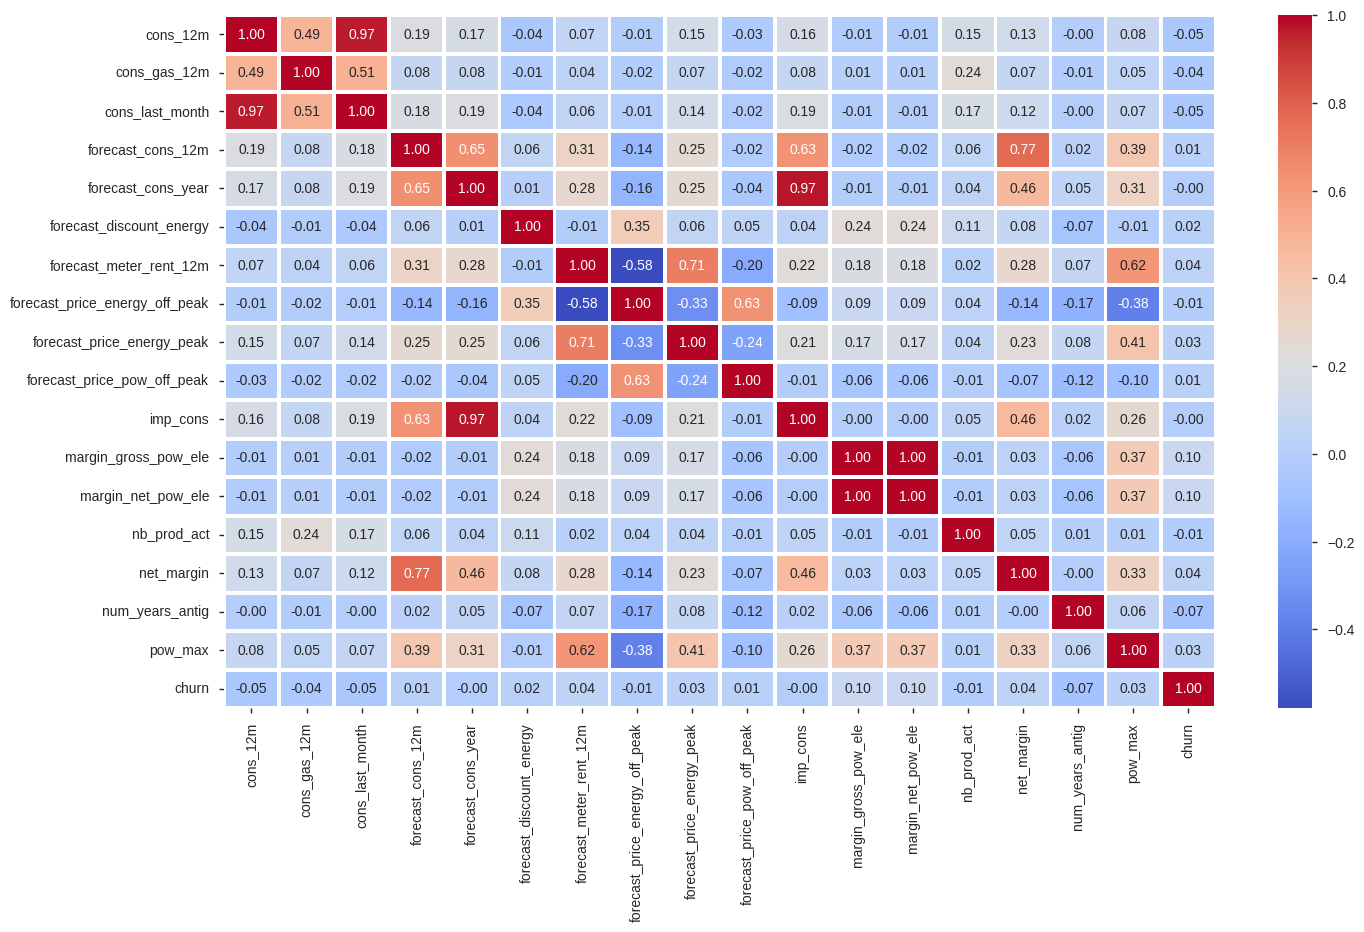

In [51]:
plt.figure(figsize=(16,9))
sns.heatmap(client_df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()

<Figure size 1600x900 with 0 Axes>

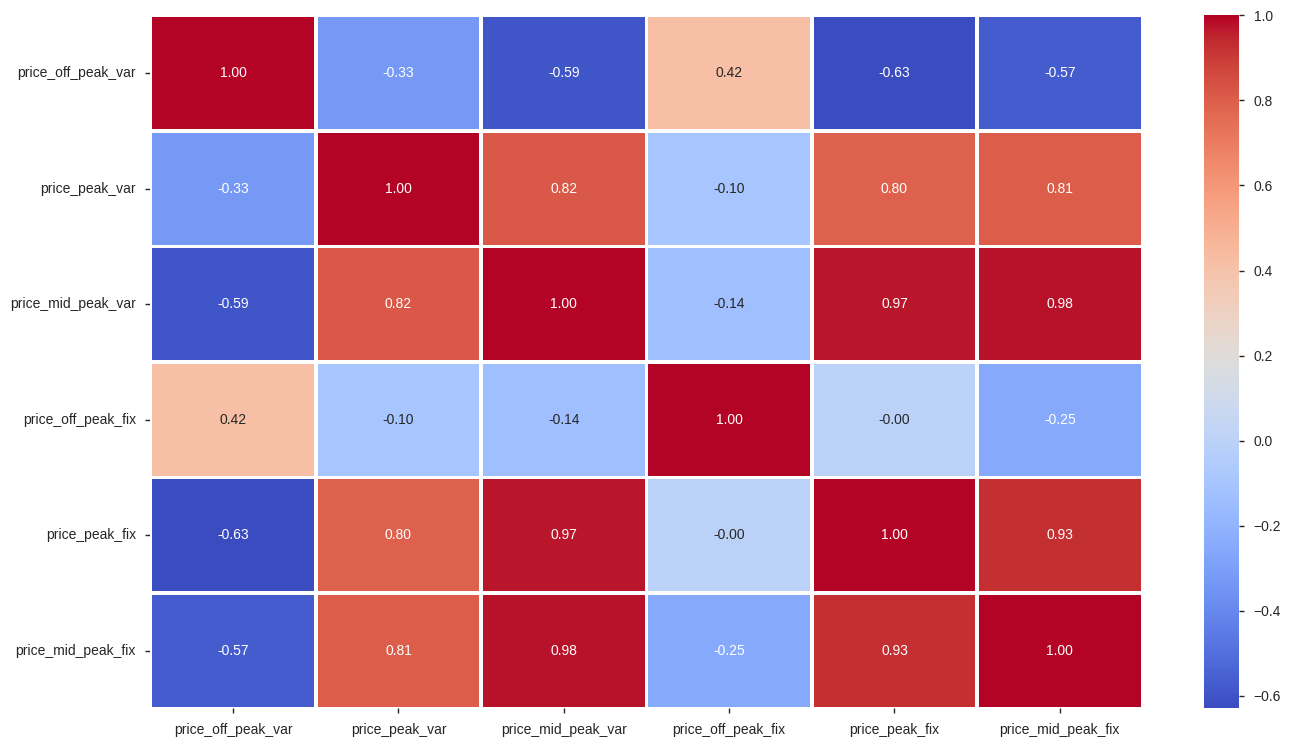

In [52]:
plt.figure(figsize=(16,9))
sns.heatmap(price_df.corr(),cmap="coolwarm",annot=True,fmt='.2f',linewidths=2)
plt.show()